# <font  color='red'><center>Reconnaissance des lettres arabes manuscrites avec Random Forest</center></font>


## Préparation des données

In [199]:
from PIL import Image
import numpy as np
import os

# Créer une liste vide pour stocker les données d'images
X = []

# Créer une liste vide pour stocker les labels des images
y = []

# Parcourir tous les sous-dossiers de 'images'
for root, dirs, files in os.walk('letters_arabic'):
    # Récupérer le titre du sous-dossier (c'est-à-dire le label de chaque image)
    label = os.path.basename(root)
    
    # Pour chaque fichier d'image dans le sous-dossier
    for file in files:
        # Charger l'image en mémoire
        img = Image.open(os.path.join(root, file))
        
        # Convertir l'image en image en niveaux de gris
        image_grayscale = img.convert('L')

        # Convertir l'image en tableau NumPy et l'ajouter à la liste des données d'images
        image_array = np.array(image_grayscale)
        X.append(image_array)
        
        # Ajouter le label à la liste des labels des images
        y.append(label)


### mélange des données

In [200]:
import random
# Créez une liste d'index qui correspond aux éléments de la liste
indexes = list(range(len(X)))

# Mélangez la liste d'index
random.shuffle(indexes)

# Mélangez les éléments de la liste en utilisant la liste d'index mélangée
X = [X[i] for i in indexes]
Y = [y[i] for i in indexes]

## Prétraitement des données

In [201]:
# Convertir les listes en tableaux NumPy
X = np.array(X)
Y = np.array(Y)

#Conversion de chaque image en tableau de 1-dimension
X = X.reshape(len(X),-1)

# normalisation des données de 0-1 
X = X.astype(float) / 255.

## Division d'ensemble des données en training et testing set

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)


## Entrainement du modèle Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

## Taux de réussite d'Entrainement

In [204]:
from sklearn.metrics import accuracy_score

# predecting the model
y_pred = model.predict(X_train)

# accuracy of the model
accuracy_score(y_pred, y_train)

0.9849492474623731

## Taux de réussite en Test

In [205]:
# predecting the model
y_pred1 = model.predict(X_test)

# accuracy of the model
accuracy_score(y_pred1, y_test)

0.5731280615815255


## <font  color='red'> Balancement du jeu de données</font>


In [206]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X,Y= over_sampler.fit_resample(X,Y)


In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)


In [208]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

## Taux de réussite d'Entrainement


In [209]:
from sklearn.metrics import accuracy_score

# predecting the model
y_pred = model.predict(X_train)

# accuracy of the model
accuracy_score(y_pred, y_train)

0.9903622250970245

## Taux de réussite de Test


In [210]:
# precting the model
y_pred1 = model.predict(X_test)

accuracy_score(y_pred1, y_test)

0.9750323415265201

## Visualisation des images réelles

In [240]:
import matplotlib.pyplot as plt  #Graphics

def show_predicted_labels(images, labels):
  # Redimensionner le tableau d'images en (n, 28, 28)
  images = images.reshape(-1, 28, 28)

  # Aplatir le tableau d'étiquettes en (n,)
  labels = labels.flatten()

  # Créer une figure avec deux lignes et cinq colonnes de sous-graphiques
  fig, axes = plt.subplots(3, 3, figsize = (18, 18))

  # Afficher chaque image dans un sous-graphique
  for i in range(9):
    ax = axes[i // 3][i % 3]
    ax.imshow(images[i], cmap='gray')
    ax.set_title("Predicted label: {}".format(labels[i]))

  # Ajuster les espacements entre les sous-graphiques
  plt.tight_layout()

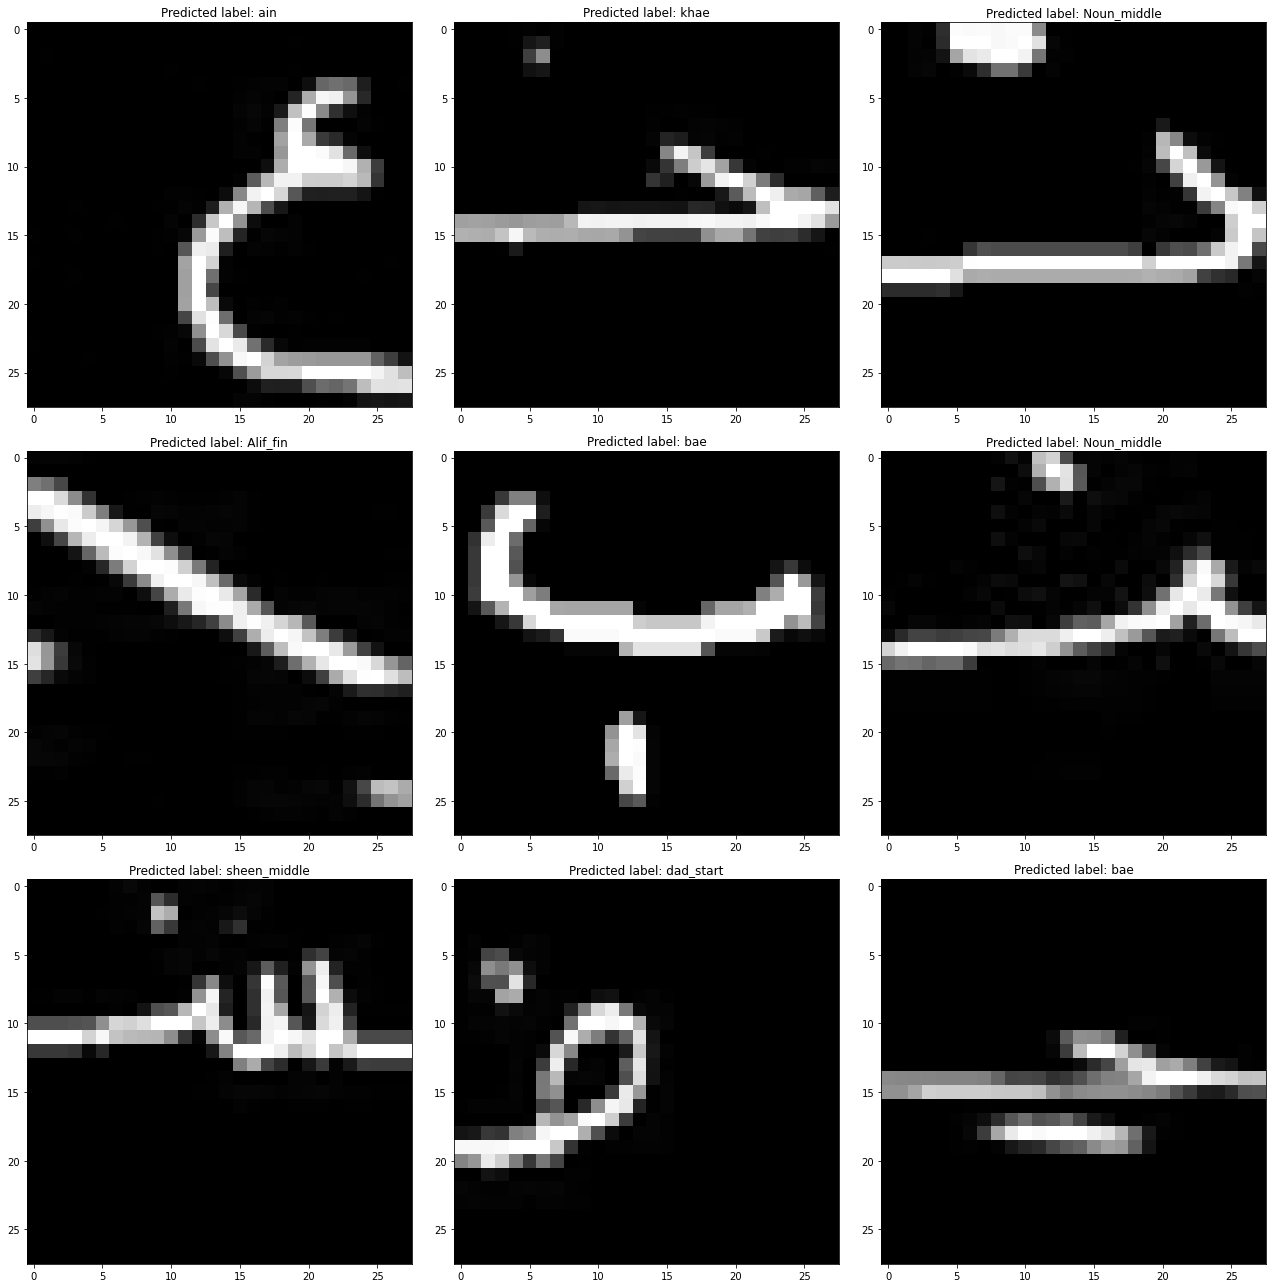

In [241]:
show_predicted_labels(X_test, y_pred1)
